In [37]:
# code based on https://medium.com/mlearning-ai/text-clustering-with-tf-idf-in-python-c94cd26a31e7

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("../../../data/processed_data/data_full_processed.csv", sep=",")
data['processed_abstract'][0]

'potential predict generation solar wind sources scalability solar wind systems systems predict production sources production predict generation increased predict production increased continues field generation hydrogen solar wind study potential forecasting hydrogen production solar wind hydrogen solar production wind study forecasting hydrogen production study field potential scalability systems'

## TF/IDF

In [11]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(data['processed_abstract'])
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.41068392, 0.        ,
        0.        ]])

## k-Means

In [16]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=8, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_
[c for c in clusters][:10]

/home/charly/anaconda3/envs/CER/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2, 0, 5, 0, 3, 0, 0, 5, 5, 0]

## PCA

In [26]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
len(x0)

363

In [27]:
data['cluster'] = clusters
data['x0'] = x0
data['x1'] = x1

data

,title,abstract,processed_abstract,cluster,x0,x1
0,Investigating the Energy Production through Su...,Artificial Intelligence (AI) has the potential...,potential predict generation solar wind source...,2,-0.238267,0.032706
1,Sustainability Is Not Enough: Towards AI Suppo...,"Sustainability, to describe it in simpler word...",describe simpler words bad limits destruction ...,0,0.061130,-0.064509
2,AI Legitimacy for Sustainability,Sustainability is a vast subject involving var...,vast subject involving research possibilities ...,5,0.168944,0.208820
3,Keynote: AI for Scientific Discovery and a Sus...,Artificial Intelligence (AI) is a rapidly adva...,advancing reasoning reach new milestones world...,0,-0.024176,-0.033455
4,Explainable AI for predicting daily household ...,"In the recent era, for most sustainable smart ...",point consideration urbanization carried expon...,3,0.006625,-0.011196
...,...,...,...,...,...,...
358,Accelerating mitigation of climate change with...,"Integrated approaches across energy, water and...",water systems climate scientific advances oppo...,7,-0.113495,0.051350
359,Reinforcement learning in sustainable energy a...,The dynamic nature of sustainable energy and e...,dynamic electric systems environment change un...,6,-0.168281,-0.084178
360,Fog computing for sustainable smart cities in ...,"In recent decade, the number of devices involv...",decade devices involved iot phenomena dramatic...,2,0.373645,-0.274104
361,Application of Artificial Intelligence to an E...,The evolution of artificial intelligence (AI) ...,resulted potential realization tremendous acce...,0,0.007707,-0.011333


## Cluster Keywords

In [30]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
technology,value,power,applications,systems,design,model,new,grid,system

Cluster 1
application,smart,devices,development,platform,big,iot,edge,computing,data

Cluster 2
prediction,panels,proposed,models,systems,network,power,devices,iot,solar

Cluster 3
optimization,management,environment,prediction,impact,control,forecasting,demand,models,consumption

Cluster 4
communication,technologies,techniques,wireless,waste,framework,production,building,buildings,green

Cluster 5
technologies,applications,life,urban,home,grids,city,grid,cities,smart

Cluster 6
devices,edge,wireless,deep,framework,distributed,networks,machine,fl,learning

Cluster 7
prediction,method,data,features,output,detection,system,deep,power,wind


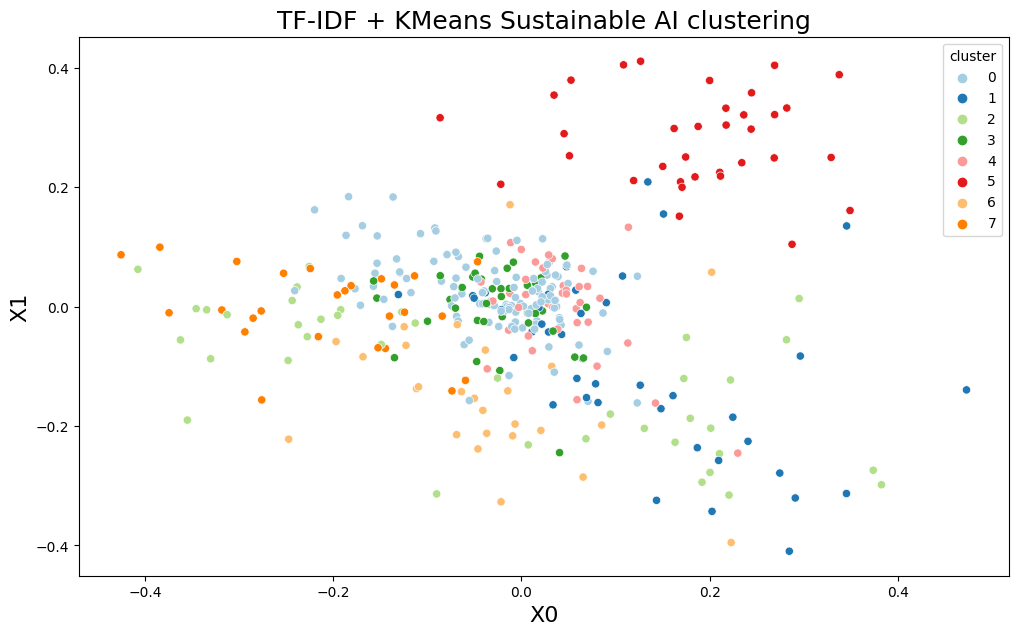

In [34]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans Sustainable AI clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=data, x='x0', y='x1', hue='cluster', palette="Paired")
plt.show()

## Silhouette Score

In [41]:
metrics.silhouette_score(X, clusters, random_state=42, metric='euclidean')

0.02062876078809691